# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Arrizal Ibnu Zainuddin
- **Email:** arrizalibnuzainuddin@gmail.com
- **ID Dicoding:** arrizal_ibnu

## Menentukan Pertanyaan Bisnis

- Bagaimana peforma Jasa sewa sepeda sepanjang tahun 2011 dan 2012?
- Pada waktu kapan sepeda disewa paling banyak dan paling sedikit?
- Apakah terdapat pengaruh dari cuaca terhadap peforma jasa sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Data Wrangling

### Gathering Data

In [25]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [26]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [27]:
# Assessing Data day
print("Jumlah Duplikasi: ", day_df.duplicated().sum())
print("\n")
day_df.info()
print("\n")
day_df.isna().sum()

Jumlah Duplikasi:  0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB




instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [28]:
# Assessing Data hour
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())
print("\n")
hour_df.info()
print("\n")
hour_df.isna().sum()

Jumlah Duplikasi:  0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB




instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

In [29]:
# menghapus kolom yang tidak digunakan atau tidak berhubungan dengan pertanyaan
drop_columns = ['season','holiday','weekday','workingday','temp','atemp','hum','windspeed']
for column in drop_columns:
        day_df.drop(labels = column, axis=1, inplace=True)
        hour_df.drop(labels = column, axis=1, inplace=True)
day_df.head()

,instant,dteday,yr,mnth,weathersit,casual,registered,cnt
0,1,2011-01-01,0,1,2,331,654,985
1,2,2011-01-02,0,1,2,131,670,801
2,3,2011-01-03,0,1,1,120,1229,1349
3,4,2011-01-04,0,1,1,108,1454,1562
4,5,2011-01-05,0,1,1,82,1518,1600


In [30]:
hour_df.head()

,instant,dteday,yr,mnth,hr,weathersit,casual,registered,cnt
0,1,2011-01-01,0,1,0,1,3,13,16
1,2,2011-01-01,0,1,1,1,8,32,40
2,3,2011-01-01,0,1,2,1,5,27,32
3,4,2011-01-01,0,1,3,1,3,10,13
4,5,2011-01-01,0,1,4,1,0,1,1


In [31]:
# mengubah tipe data dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df.info()
print("\n")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   weathersit  731 non-null    int64         
 5   casual      731 non-null    int64         
 6   registered  731 non-null    int64         
 7   cnt         731 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 45.8 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   yr          17379 non-null  int64         
 3   mnt

In [32]:
# mengubah nama kolom pada tabel day_df
day_df.rename(columns={
    'dteday':'date', 'yr':'year', 'weathersit':'weather',
    'mnth':'month','cnt':'count'
}, inplace=True)
day_df.head()

,instant,date,year,month,weather,casual,registered,count
0,1,2011-01-01,0,1,2,331,654,985
1,2,2011-01-02,0,1,2,131,670,801
2,3,2011-01-03,0,1,1,120,1229,1349
3,4,2011-01-04,0,1,1,108,1454,1562
4,5,2011-01-05,0,1,1,82,1518,1600


In [33]:
# mengubah nama kolom pada tabel hour_df
hour_df.rename(columns={
    'dteday':'date', 'yr':'year', 'weathersit':'weather',
    'mnth':'month', 'hr':'hour', 'cnt':'count'
}, inplace=True)
hour_df.head()

,instant,date,year,month,hour,weather,casual,registered,count
0,1,2011-01-01,0,1,0,1,3,13,16
1,2,2011-01-01,0,1,1,1,8,32,40
2,3,2011-01-01,0,1,2,1,5,27,32
3,4,2011-01-01,0,1,3,1,3,10,13
4,5,2011-01-01,0,1,4,1,0,1,1


In [34]:
# Mengkonversi nilai-nilai pada kolom tabel tertentu menjadi kategorik pada tabel day_df
month_dict = {
    1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
    7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'
}

wheather_dict = {
    1:'Clear', 2:'Mist/Cloudy',
    3:'Light Rain/Snow', 4:'Heavy Rain/snow'
}

year_dict = {
    0:2011, 1:2012
}

day_df["month"] = day_df["month"].map(lambda x: month_dict[x])
day_df["weather"] = day_df["weather"].map(lambda x: wheather_dict[x])
day_df["year"] = day_df["year"].map(lambda x: year_dict[x])
day_df.head()

,instant,date,year,month,weather,casual,registered,count
0,1,2011-01-01,2011,January,Mist/Cloudy,331,654,985
1,2,2011-01-02,2011,January,Mist/Cloudy,131,670,801
2,3,2011-01-03,2011,January,Clear,120,1229,1349
3,4,2011-01-04,2011,January,Clear,108,1454,1562
4,5,2011-01-05,2011,January,Clear,82,1518,1600


In [35]:
# Mengkonversi nilai-nilai pada kolom tabel tertentu menjadi kategorik pada tabel hour_df
hour_df["month"] = hour_df["month"].map(lambda x: month_dict[x])
hour_df["weather"] = hour_df["weather"].map(lambda x: wheather_dict[x])
hour_df["year"] = hour_df["year"].map(lambda x: year_dict[x])
hour_df.head()

,instant,date,year,month,hour,weather,casual,registered,count
0,1,2011-01-01,2011,January,0,Clear,3,13,16
1,2,2011-01-01,2011,January,1,Clear,8,32,40
2,3,2011-01-01,2011,January,2,Clear,5,27,32
3,4,2011-01-01,2011,January,3,Clear,3,10,13
4,5,2011-01-01,2011,January,4,Clear,0,1,1


In [36]:
# Menambah keterangan waktu
hour_df['time'] = hour_df['hour'].apply(lambda x: "Night" if (x < 5 or x >= 18) else("Morning" if (x >= 5 and x < 12) else "Afternoon"))
hour_df.tail()

,instant,date,year,month,hour,weather,casual,registered,count,time
17374,17375,2012-12-31,2012,December,19,Mist/Cloudy,11,108,119,Night
17375,17376,2012-12-31,2012,December,20,Mist/Cloudy,8,81,89,Night
17376,17377,2012-12-31,2012,December,21,Clear,7,83,90,Night
17377,17378,2012-12-31,2012,December,22,Clear,13,48,61,Night
17378,17379,2012-12-31,2012,December,23,Clear,12,37,49,Night


In [37]:
# Mengubah format hour menjadi am-pm
hour_df['hour'] = hour_df['hour'].apply(lambda x: str(x)+" am" if x < 12 else str(x-12)+" pm")
hour_df.head()

,instant,date,year,month,hour,weather,casual,registered,count,time
0,1,2011-01-01,2011,January,0 am,Clear,3,13,16,Night
1,2,2011-01-01,2011,January,1 am,Clear,8,32,40,Night
2,3,2011-01-01,2011,January,2 am,Clear,5,27,32,Night
3,4,2011-01-01,2011,January,3 am,Clear,3,10,13,Night
4,5,2011-01-01,2011,January,4 am,Clear,0,1,1,Night


## Exploratory Data Analysis (EDA)

### Explore data harian (day data)

In [38]:
day_df.describe(include='all')

,instant,date,year,month,weather,casual,registered,count
count,731.000000,731,731.000000,731,731,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,12,3,NaN,NaN,NaN
top,NaN,NaN,NaN,January,Clear,NaN,NaN,NaN
freq,NaN,NaN,NaN,62,463,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,2011.500684,NaN,NaN,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,NaN,NaN,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,NaN,NaN,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,NaN,NaN,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,NaN,NaN,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,NaN,NaN,3410.000000,6946.000000,8714.000000


In [39]:
day_df.groupby(by='year').agg({
    'casual':['sum','mean'],
    'registered':['sum', 'mean'],
    'count':['min', 'max', 'sum', 'mean']
})

casual              registered              count                 \
         sum         mean        sum         mean   min   max      sum   
year                                                                     
2011  247252   677.402740     995851  2728.358904   431  6043  1243103   
2012  372765  1018.483607    1676811  4581.450820    22  8714  2049576   

                   
             mean  
year               
2011  3405.761644  
2012  5599.934426

In [40]:
day_df.groupby(by='month').agg({
    'casual':['sum','mean'],
    'registered':['sum', 'mean'],
    'count':['min','max','sum','mean']
})

casual              registered              count                \
             sum         mean        sum         mean   min   max     sum   
month                                                                       
April      60802  1013.366667     208292  3471.533333   795  7460  269094   
August     72039  1161.919355     279155  4502.500000  1115  7865  351194   
December   21693   349.887097     189343  3053.919355   441  6606  211036   
February   14963   262.508772     136389  2392.789474  1005  5062  151352   
January    12042   194.225806     122891  1982.112903   431  4521  134933   
July       78157  1260.596774     266791  4303.080645  3285  8173  344948   
June       73906  1231.766667     272436  4540.600000  3767  8120  346342   
March      44444   716.838710     184476  2975.419355   605  8362  228920   
May        75285  1214.274194     256401  4135.500000  2633  8294  331686   
November   36603   610.050000     218228  3637.133333  1495  6852  254831   
October    59760   963.870968     262592  4235.354839    22  8156  322352   
September  70323  1172.050000     275668  4594.466667  1842  8714  345991   

                        
                  mean  
month                   
April      4484.900000  
August     5664.419355  
December   3403.806452  
February   2655.298246  
January    2176.338710  
July       5563.677419  
June       5772.366667  
March      3692.258065  
May        5349.774194  
November   4247.183333  
October    5199.225806  
September  5766.516667

### Explore data per jam (hour data)

In [41]:
hour_df.describe(include='all')

,instant,date,year,month,hour,weather,casual,registered,count,time
count,17379.0000,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,NaN,12,24,4,NaN,NaN,NaN,3
top,NaN,NaN,NaN,May,5 pm,Clear,NaN,NaN,NaN,Night
freq,NaN,NaN,NaN,1488,730,11413,NaN,NaN,NaN,7927
mean,8690.0000,2012-01-02 04:08:34.552045568,2011.502561,NaN,NaN,NaN,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,2011.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,2011.000000,NaN,NaN,NaN,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,2012.000000,NaN,NaN,NaN,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,2012.000000,NaN,NaN,NaN,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,2012.000000,NaN,NaN,NaN,367.000000,886.000000,977.000000,NaN


In [42]:
hour_df.groupby(by='weather').agg({
    'casual':['min','max','sum','mean'],
    'registered':['min','max','sum','mean'],
    'count':['sum','mean']
})

casual                         registered                \
                   min  max     sum       mean        min  max      sum   
weather                                                                   
Clear                0  367  462745  40.545431          0  886  1875428   
Heavy Rain/snow      1    6       8   2.666667         22  158      215   
Light Rain/Snow      0  263   22783  16.055673          0  791   135548   
Mist/Cloudy          0  350  134481  29.595290          0  822   661471   

                               count              
                       mean      sum        mean  
weather                                           
Clear            164.323841  2338173  204.869272  
Heavy Rain/snow   71.666667      223   74.333333  
Light Rain/Snow   95.523608   158331  111.579281  
Mist/Cloudy      145.570202   795952  175.165493

In [43]:
hour_df.groupby(by='time').agg({
    'casual':['min','max','sum','mean'],
    'registered':['min','max','sum','mean'],
    'count':['sum','mean']
})

casual                         registered                           \
             min  max     sum       mean        min  max     sum        mean   
time                                                                           
Afternoon      0  367  320180  73.184000          3  885  972562  222.299886   
Morning        0  268  127360  25.085681          0  808  794220  156.434903   
Night          0  266  172477  21.758168          0  886  905880  114.277785   

             count              
               sum        mean  
time                            
Afternoon  1292742  295.483886  
Morning     921580  181.520583  
Night      1078357  136.035953

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana peforma Jasa sewa sepeda sepanjang tahun 2011 dan 2012?

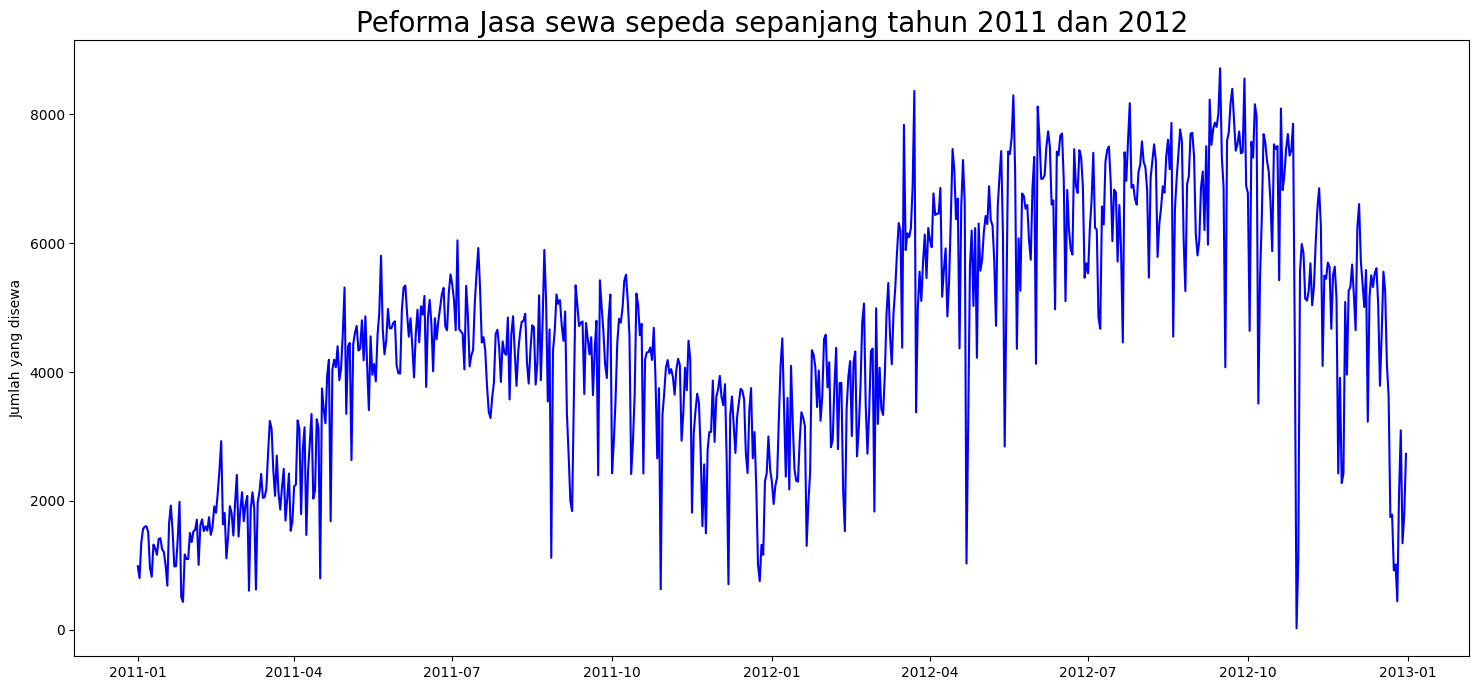

In [44]:
plt.figure(figsize=(18,8))
plt.plot(day_df['date'], day_df['count'], color='blue')
plt.title("Peforma Jasa sewa sepeda sepanjang tahun 2011 dan 2012", size=20, loc='center')
plt.ylabel("Jumlah yang disewa")
plt.show()

In [45]:
monthly_count = day_df.groupby(by=['year','month']).agg({
    "count": "sum"
}).reset_index()

monthly_count['month'] = pd.Categorical(monthly_count['month'], categories=
    ['January','February','March','April','May','June','July','August',
    'September','October','November','December'],ordered=True)

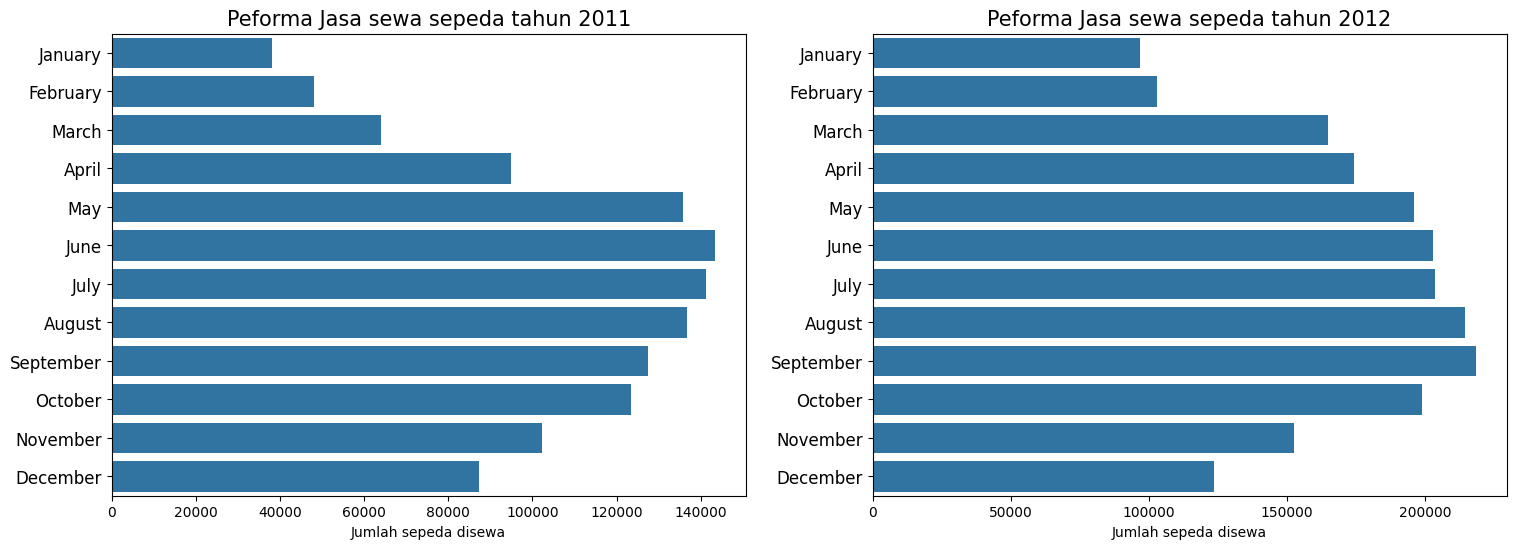

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

sns.barplot(x='count', y='month', data=monthly_count[monthly_count['year'] == 2011],
            ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel('Jumlah sepeda disewa')
ax[0].set_title("Peforma Jasa sewa sepeda tahun 2011", loc='center', fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x='count', y='month', data=monthly_count[monthly_count['year'] == 2012],
            ax=ax[1])
ax[1].set_xlabel('Jumlah sepeda disewa')
ax[1].set_ylabel(None)
ax[1].set_title("Peforma Jasa sewa sepeda tahun 2012", loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)


### Pertanyaan 2: Pada waktu kapan sepeda disewa paling banyak dan paling sedikit?

C:\Users\arriz\AppData\Local\Temp\ipykernel_2840\2486670029.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=time_count['count'], x=time_count['time'],


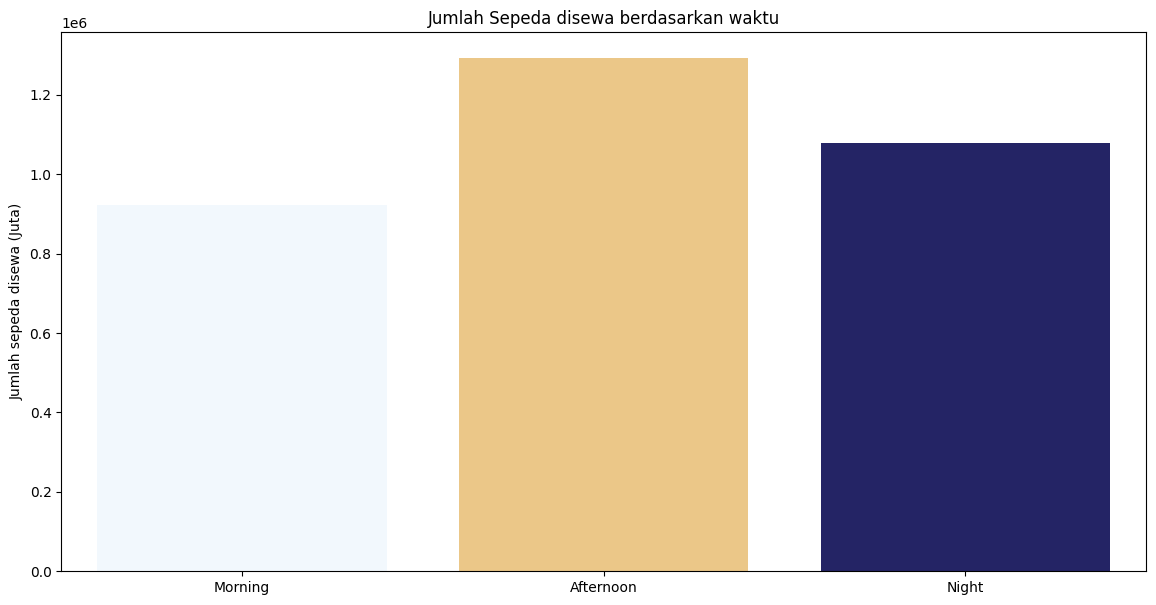

In [47]:
time_count = hour_df.groupby(by='time').agg({
    'count':'sum'
}).reset_index()

time_count['time'] = pd.Categorical(time_count['time'],
                                     categories=['Morning', 'Afternoon', 'Night'], ordered=True)

plt.figure(figsize=(14,7))
colors = ['#F0F8FF', '#FBCB78', '#191970']

sns.barplot(y=time_count['count'], x=time_count['time'],
            orient='v', palette=colors)
plt.xlabel(None)
plt.ylabel("Jumlah sepeda disewa (Juta)")
plt.title("Jumlah Sepeda disewa berdasarkan waktu")
plt.show()

### Pertanyaan 3: Apakah terdapat pengaruh dari cuaca terhadap peforma jasa sewa sepeda?

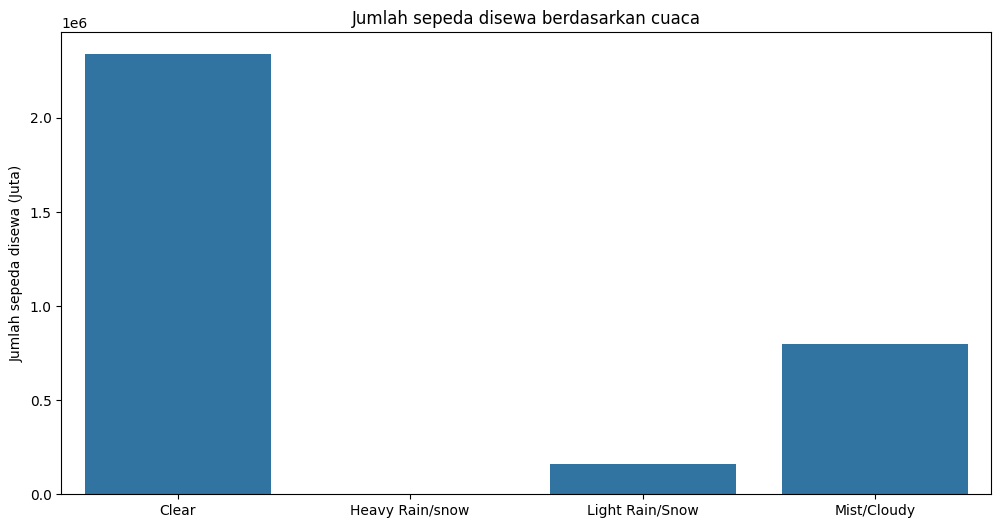

In [48]:
weather_count = hour_df.groupby(by='weather').agg({
    'count':'sum'
}).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x=weather_count['weather'], y=weather_count['count'],
            orient='v', errorbar=None)
plt.xlabel(None)
plt.ylabel("Jumlah sepeda disewa (Juta)")
plt.title("Jumlah sepeda disewa berdasarkan cuaca")
plt.show()

## Conclusion

- Conclution pertanyaan 1:
 Berdasarkan grafik peforma jasa sewa sepeda sepanjang tahun 2011 dan 2012 terdapat adanya peningkatan sepeda disewa pada pertengahan tahun (Mei-Agustus). Hal ini diperkuat oleh grafik per bulan pada tahun 2011 dan 2012.


- Conclution pertanyaan 2:
 Pada waktu siang dan sore hari sepeda paling banyak disewa. Sedangkan pada waktu pagi hari ialah waktu paling sedikit sepeda disewa.

- Conclution pertanyaan 3:
Terdapat pengaruh cuaca terhadap banyaknya sepeda yang disewa. Hal ini ditunjukkan bahwa pada cuaca cerah jauh lebih banyak sepeda yang disewa.

  